# Autoencoders

The project involves buliding an Autoencoder that can reconstruct the original image after removing the noise:-


In [19]:

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,BatchNormalization,UpSampling2D
from keras.optimizers import Adam,Adagrad #optimizers
from keras.datasets import mnist #Import datasets from inbulit Keras Datasets


In [36]:
#defining the convolutional encoder-decoder model 
model=Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(28,28,1,)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))  
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
model.compile(optimizer=Adam(),metrics=['accuracy'],loss='binary_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_16 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 8)         584       
__________

In [33]:
#preprocessing data
from keras.datasets import mnist
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train_img=x_train.reshape(x_train.shape[0],28,28,1)
x_test_img=x_test.reshape(x_test.shape[0],28,28,1)


In [37]:
#Trainig the model
model.fit(x_train_img,x_train_img,epochs=20,batch_size=200,shuffle=True,validation_data=(x_test_img,x_test_img))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1956 - acc: 0.8075 - val_loss: 0.0981 - val_acc: 0.8116
Epoch 2/20
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0922 - acc: 0.8132 - val_loss: 0.0860 - val_acc: 0.8130
Epoch 3/20
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0838 - acc: 0.8142 - val_loss: 0.0807 - val_acc: 0.8135
Epoch 4/20
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0802 - acc: 0.8146 - val_loss: 0.0783 - val_acc: 0.8138
Epoch 5/20
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0783 - acc: 0.8148 - val_loss: 0.0767 - val_acc: 0.8139
Epoch 6/20
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0770 - acc: 0.8149 - val_loss: 0.0757 - val_acc: 0.8139
Epoch 7/20
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0760 - acc: 0.8150 - val_loss: 0.0750 - 

In [52]:
#passing noised inputs through encoder
x_test=x_test_img+np.random.randn(28,28,1)/10
encodes=model.predict(x_test)

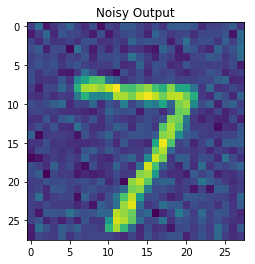

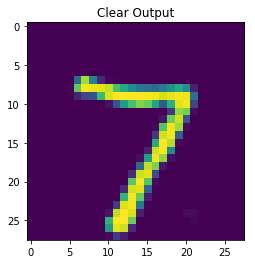

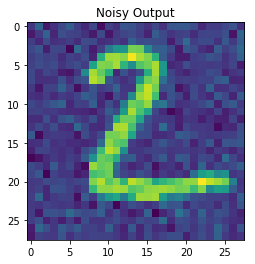

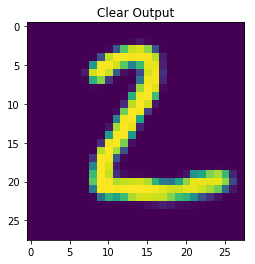

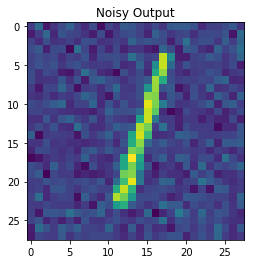

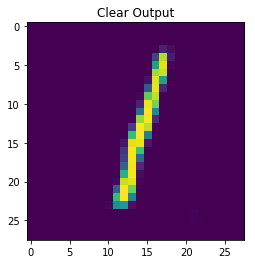

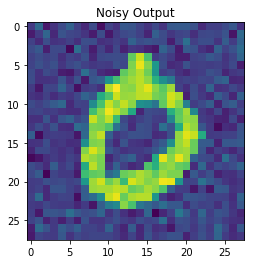

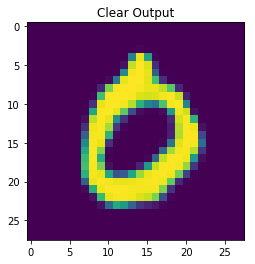

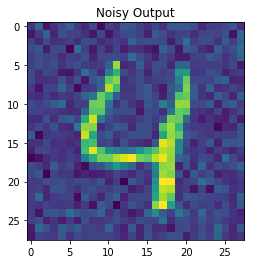

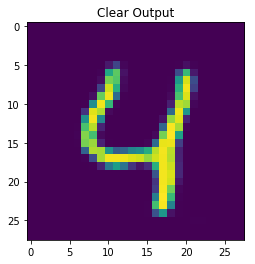

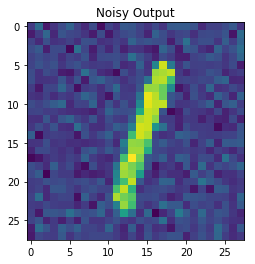

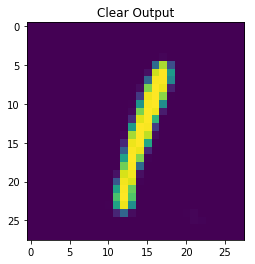

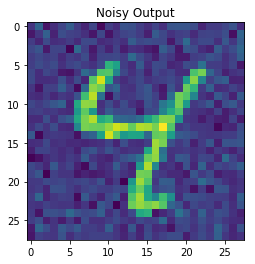

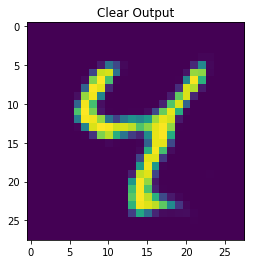

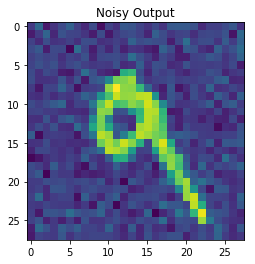

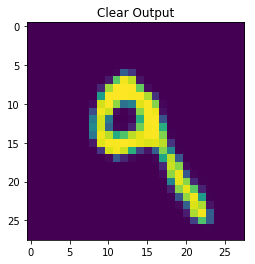

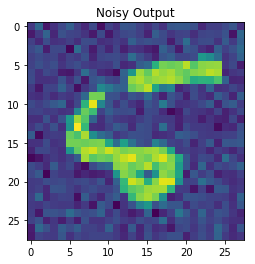

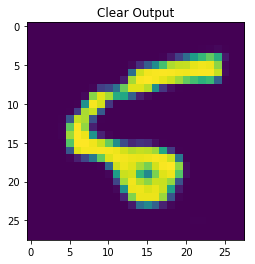

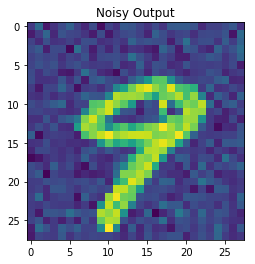

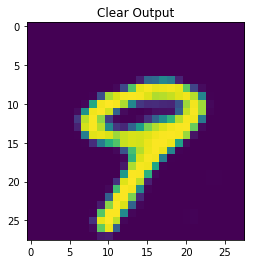

In [57]:
#let us have a look at some of the inputs and outputs
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Noisy Output")
    plt.show()
    plt.imshow(encodes[i].reshape(28,28))
    plt.title("Clear Output")
    plt.show()
